In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf

In [2]:
haadf_dir = '../../secondary_data/main_mosaic_5by6_haadf.npz'
bit_depth = 8 # can be changed

In [3]:
# load the haadfs and list their medians
haadfs = np.load(haadf_dir)['haadf']
medians = []

for i in range(haadfs.shape[2]):
    medians.append(np.median(haadfs[:,:,i]))

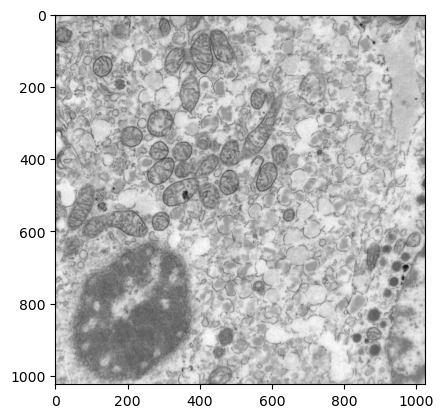

In [4]:
# equalize the medians by shifting them according to the lowest median
haadfs_corr = np.zeros(haadfs.shape)
for i in range(haadfs_corr.shape[2]):
    median = np.median(haadfs[:,:,i])
    factor = median - np.min(medians)
    haadfs_corr[:,:,i] = haadfs[:,:,i] - factor

# min/max normalize, convert to bit_depth and subsequently invert
haadfs_corr = np.invert(((haadfs_corr-np.min(haadfs_corr))/(np.max(haadfs_corr)-np.min(haadfs_corr))*(pow(2,bit_depth)-1)).astype(('uint' + str(bit_depth))))
plt.imshow(haadfs_corr[:,:,0], cmap= 'gray')

In [5]:
# write array to a single multi-dimensional tiff-file
tf.imwrite("../../secondary_data/main_mosaic_5by6_haadf.tiff", haadfs_corr.transpose(2,0,1))

In [6]:
# write array to individual tiff-files
for i in range(haadfs_corr.shape[2]):
    tf.imwrite("../../secondary_data/haadf_tiffs/Tile_"+ "%02d" %(i)+ ".tiff ", haadfs_corr[:,:,i])